# Set up

1. Download and unzip AML dataset from: http://acgt.cs.tau.ac.il/multi_omic_benchmark/download.html (Rappoport & Shamir, 2019).
2. Install required packages (see set_up.R for instructions if needed)

In [61]:
library(tidyverse)
library(ggalluvial)
library(ComplexHeatmap)

In [3]:
# Specify path to directory with downloaded data
data_dir_path = "aml"
stopifnot(file.exists(file.path(data_dir_path, 'exp')) & file.exists(file.path(data_dir_path, 'methy')) & 
          file.exists(file.path(data_dir_path, 'mirna')))

In [9]:
# Inrease plot resolution in this notebook
options(repr.plot.res=150)

# Acute Myleoid Leukemia (AML) Dataset

## (1) Closer look at the data 

In [4]:
# load gene expression data as data.frame
data_exp <- read.table(file.path(data_dir_path, 'exp'))
data_exp

TCGA.AB.2803.03 TCGA.AB.2805.03 TCGA.AB.2806.03
X..100130426       0.0000           0.6693          0.0000      
X..100133144       0.0000           1.3387         14.1884      
X..100134869       0.0000           0.0000         16.3654      
X..10357          92.5926          92.6305        119.5990      
X..10431         876.5432         421.6867        625.0796      
X..136542          0.0000           0.0000          0.0000      
X..155060        627.5720         627.1754        826.2253      
X..26823           9.2593           9.3708          4.4558      
X..280660          0.0000           0.0000          0.0000      
X..317712          0.0000           0.0000          0.0000      
X..340602          4.1152           0.0000          0.0000      
X..388795          0.0000           1.3387          8.2750      
X..390284          2.0576           4.6854          5.0923      
X..391343          0.0000           0.0000          0.6365      
X..391714          1.0288           3.3467          5.7288      
X..404770          0.0000           0.0000          0.0000      
X..441362          0.0000           0.0000          0.0000      
X..442388          0.0000           0.0000          0.0000      
X..553137          0.0000           0.0000          0.0000      
X..57714         683.1276        5139.8929       1841.5022      
X..645851        111.1111         112.4498         94.2075      
X..652919          0.0000          43.7349         52.1961      
X..653553         26.7490           7.3628         11.4577      
X..728045          0.0000           0.0000          0.0000      
X..728603          0.0000           0.0000          0.0000      
X..728788          1.0288           0.0000          0.0000      
X..729884          0.0000           0.0000          0.0000      
X..8225          667.6955         493.9759        206.2381      
X..90288           2.0576          14.7256          4.4558      
A1BG.1           412.4280          84.7724        187.1483      
⋮                ⋮               ⋮               ⋮              
ZSCAN20.7579      100.8230         56.2249         77.0210      
ZSCAN21.7589      356.9959        130.9705        231.0630      
ZSCAN22.342945    293.2099        212.8514        499.6817      
ZSCAN23.222696     39.0947          2.6774        136.2190      
ZSCAN29.146050    912.5514       1008.7015       1589.4335      
ZSCAN2.54993      498.9712        249.6653        617.4411      
ZSCAN4.201516       2.0576          0.0000          0.6365      
ZSCAN5A.79149     188.2716         95.0469        110.7575      
ZSCAN5B.342933      3.0864          2.0080          1.2731      
ZSWIM1.90204      483.5391        369.4779        413.1127      
ZSWIM2.151112       0.0000          0.0000          0.0000      
ZSWIM3.140831     255.1440        188.0857        173.1381      
ZSWIM4.65249      313.7860        214.1901        435.3915      
ZSWIM5.57643        6.1728          7.3628         12.0942      
ZSWIM6.57688      554.5267       1964.5248        763.2081      
ZSWIM7.125150     531.2449        369.2771        387.0974      
ZUFSP.221302      230.4527        370.8166        295.9898      
ZW10.9183         241.7695        484.6051        462.7626      
ZWILCH.55055      400.3909        557.4766        734.4239      
ZWINT.11130       246.9136        376.1714        441.7568      
ZXDA.7789          32.9218         12.0482         67.4729      
ZXDB.158586       451.6461        356.0910        825.5888      
ZXDC.79364       3404.3210       4020.0803       3817.3138      
ZYG11A.440590      15.4321          2.6774          1.9096      
ZYG11B.79699     1108.0247       1774.4311        749.2043      
ZYX.7791         4480.4527       5780.4552       5467.8549      
ZZEF1.23140      2488.6831       3826.6399       3679.8218      
ZZZ3.26009       1199.5885       1145.9170       1944.6213      
psiTPTE22.387590   16.4609         12.0482         97.3902      
tAKR.389932         0.0000          5.3548          

In [6]:
# load methylation data as data.frame
data_met <- read.table(file.path(data_dir_path, 'methy'))
data_met

TCGA.AB.2802.03 TCGA.AB.2803.03 TCGA.AB.2804.03 TCGA.AB.2805.03
cg00001793 0.92385220      0.93927722      0.76250401      0.83292329     
cg00010853 0.64291425      0.90461720      0.82924684      0.80344472     
cg00025496 0.68231203      0.07491889      0.26578677      0.96939722     
cg00028211 0.87893537      0.06513455      0.32349260      0.48323723     
cg00034755 0.27127141      0.56376146      0.58081579      0.85717918     
cg00037457 0.08208679      0.24786474      0.38417990      0.16624475     
cg00044505 0.31929586      0.05880984      0.18020943      0.35811208     
cg00049664 0.02701107      0.02728094      0.02073215      0.92291592     
cg00054210 0.36148984      0.15032450      0.26269211      0.95848134     
cg00054472 0.15091318      0.30564943      0.34056691      0.42154503     
cg00055529 0.07169167      0.92810013      0.35108738      0.93525578     
cg00058329 0.88504812      0.47620358      0.04969735      0.88434261     
cg00058449 0.44906852      0.02936380      0.14273565      0.96534254     
cg00072587 0.47675979      0.56295355      0.15863183      0.20819173     
cg00073460 0.10313661      0.52719399      0.55185514      0.85584715     
cg00074145 0.52687218      0.71714982      0.07636856      0.96237384     
cg00080972 0.54442009      0.61030702      0.11513540      0.95079949     
cg00084338 0.06092397      0.03110511      0.21427190      0.97411268     
cg00093433 0.10461625      0.19181816      0.19541700      0.77852738     
cg00097146 0.18295287      0.93401644      0.54285282      0.25119358     
cg00106345 0.17381568      0.03564979      0.20793222      0.53157623     
cg00114913 0.07608544      0.56339845      0.02406292      0.02861187     
cg00123762 0.09960356      0.15087043      0.03451468      0.04711617     
cg00129811 0.18460579      0.47319700      0.77879244      0.08618704     
cg00134539 0.76412704      0.15890392      0.13907517      0.91998565     
cg00135293 0.76315282      0.07121683      0.24757689      0.12707037     
cg00139681 0.05912171      0.06844814      0.29161817      0.83912332     
cg00141845 0.29943291      0.39036865      0.87964782      0.31406427     
cg00147788 0.03749648      0.42566094      0.49880515      0.39598163     
cg00150363 0.16731043      0.85811192      0.55983593      0.13128074     
⋮          ⋮               ⋮               ⋮               ⋮              
rs2804694  0.44755094      0.43944507      0.97123732      0.97579095     
rs2857639  0.59199505      0.60207754      0.03638839      0.58545935     
rs348937   0.50042702      0.96357906      0.06777305      0.53068329     
rs3818562  0.01748961      0.01736743      0.46206805      0.48195783     
rs3936238  0.45884170      0.45541531      0.47935404      0.44283667     
rs4331560  0.96881841      0.46956236      0.97128462      0.02123171     
rs472920   0.03917202      0.59649153      0.96862273      0.56682825     
rs4742386  0.50225184      0.52518312      0.49026277      0.03369613     
rs5926356  0.88288700      0.45113218      0.93963480      0.89680015     
rs5931272  0.01264583      0.47121273      0.01593809      0.01620205     
rs5936512  0.03384695      0.02238039      0.03439509      0.95867079     
rs5987737  0.95996770      0.01602885      0.95948414      0.02842040     
rs6426327  0.02409740      0.02305089      0.02769008      0.03278336     
rs6471533  0.95424977      0.48854083      0.07143170      0.49899456     
rs6546473  0.97977786      0.01452892      0.01664172      0.01842294     
rs6626309  0.93325383      0.50246118      0.07050353      0.92584056     
rs6982811  0.60014857      0.61161786      0.03640652      0.62153898     
rs6991394  0.08746004      0.08121845      0.08261162      0.52372961     
rs715359   0.97729618      0.97568035      0.97715485      0.97780757     
rs739259   0.47823026      0.47140405      0.48019126      0.02040310     
rs7660805  0.58040339      0.97292428      0.53869175      0.58387781     
rs7746156  0.97095744      0.4557219

In [10]:
# load microRNA expression data as data.frame
data_mirna <- read.table(file.path(data_dir_path, 'mirna'))
data_mirna

TCGA.AB.2802.03 TCGA.AB.2803.03 TCGA.AB.2805.03
hsa.let.7a.1     9.239468e+03    1.069925e+04     6724.518911   
hsa.let.7a.2     1.791703e+04    2.174664e+04    13272.048570   
hsa.let.7a.3     9.302053e+03    1.058912e+04     6754.553451   
hsa.let.7b       4.009665e+04    8.930990e+03    13710.767382   
hsa.let.7c       4.748306e+02    1.234494e+02       58.996417   
hsa.let.7d       2.239459e+03    1.229166e+03     3983.867162   
hsa.let.7e       4.299326e+02    5.923797e+02      842.039774   
hsa.let.7f.1     3.673474e+01    8.348380e+01       51.487782   
hsa.let.7f.2     5.194565e+03    1.278013e+04     5573.552442   
hsa.let.7g       2.583677e+03    7.433610e+02     3000.235986   
hsa.let.7i       9.142870e+02    8.739155e+02     1413.768691   
hsa.mir.1.1      0.000000e+00    0.000000e+00        0.000000   
hsa.mir.1.2      1.768710e+01    8.881250e-01        1.072662   
hsa.mir.100      1.673472e+02    1.587027e+05       85.812971   
hsa.mir.101.1    8.900692e+03    2.883211e+04    15703.773625   
hsa.mir.101.2    2.857147e+01    2.992983e+02       26.816553   
hsa.mir.103.1    1.261770e+04    4.055181e+04    39657.391715   
hsa.mir.103.1.as 0.000000e+00    0.000000e+00        0.000000   
hsa.mir.103.2    5.986403e+01    9.769380e+00       72.941025   
hsa.mir.103.2.as 0.000000e+00    0.000000e+00        0.000000   
hsa.mir.105.1    0.000000e+00    0.000000e+00        0.000000   
hsa.mir.105.2    0.000000e+00    0.000000e+00        0.000000   
hsa.mir.106a     7.877562e+02    5.417565e+01      642.524618   
hsa.mir.106b     2.044901e+03    7.327035e+02     3087.121618   
hsa.mir.107      1.006804e+02    5.062315e+01       96.539592   
hsa.mir.10a      3.038127e+05    1.769146e+03    33084.118164   
hsa.mir.10b      2.240819e+03    2.237188e+03      100.830240   
hsa.mir.1178     0.000000e+00    0.000000e+00        0.000000   
hsa.mir.1179     0.000000e+00    8.881250e-01        2.145324   
hsa.mir.1180     2.721092e+00    0.000000e+00        9.653959   
⋮                ⋮               ⋮               ⋮              
hsa.mir.9.1       5450.347551      718.493526       61.141742   
hsa.mir.9.2       5253.068372      754.906671       54.705769   
hsa.mir.9.3          8.163276        0.888125        1.072662   
hsa.mir.920          0.000000        0.000000        0.000000   
hsa.mir.921          0.000000        0.000000        0.000000   
hsa.mir.922          0.000000        0.000000        0.000000   
hsa.mir.924          0.000000        0.000000        0.000000   
hsa.mir.92a.1     2040.819103     1452.085185     1945.809109   
hsa.mir.92a.2    55182.388003    24573.544340    39561.924785   
hsa.mir.92b         42.176928       15.098133       48.269796   
hsa.mir.93        9782.326234     4620.916954    15797.095231   
hsa.mir.933          0.000000        0.000000        1.072662   
hsa.mir.934          0.000000        0.000000        0.000000   
hsa.mir.935          0.000000        0.000000        0.000000   
hsa.mir.936          0.000000        0.000000        0.000000   
hsa.mir.937          0.000000        0.000000        1.072662   
hsa.mir.938          0.000000        0.000000        0.000000   
hsa.mir.939          0.000000        0.000000        1.072662   
hsa.mir.940          9.523822        0.888125        9.653959   
hsa.mir.941.1        0.000000        0.000000        0.000000   
hsa.mir.941.2        0.000000        0.000000        0.000000   
hsa.mir.941.3        0.000000        0.000000        0.000000   
hsa.mir.942         35.374198        8.881255       23.598567   
hsa.mir.943          0.000000        0.000000        0.000000   
hsa.mir.944          6.802730        0.000000        0.000000   
hsa.mir.95           1.360546        0.000000        0.000000   
hsa.mir.96           1.360546        0.888125        1.072662   
hsa.mir.98          93.877679      103.910683      214.532427   
hsa.mir.99a        209.524095      119.896942       10.726621   
hsa.mir.99b       1993.199991     3083.571721    171

**Warm up exercise**:
1. How many samples and features are in each data matrix?
2. What type of biological samples are in this dataset? (Hint: look up the TCGA barcodes)
3. What do values in each data matrix represent?

In [11]:
tibble(sample = c(colnames(data_exp), colnames(data_met), colnames(data_mirna))) %>%
    distinct() %>%
    separate(sample, c('tcga', 'tss', 'participant', 'st'), sep="\\.") %>%
    group_by(st) %>%
    summarise(nsample=n())

st nsample
1 03 197

## (2) TCGA Subtypes

How many uniques samples are in our dataset? 

In [20]:
tibble(sample = colnames(data_exp), layer="exp") %>%
    full_join(tibble(sample = colnames(data_met), layer="met"), by = c("sample", "layer")) %>%
    full_join(tibble(sample = colnames(data_mirna), layer="mirna"), by = c("sample", "layer")) %>%
    spread(layer,layer) %>%
    mutate(layers=paste(exp, met, mirna, sep=",")) %>%
    group_by(layers) %>%
    summarise(nsample=n())

layers        nsample
1 exp,met,mirna 170    
2 exp,NA,mirna    3    
3 NA,met,mirna   15    
4 NA,met,NA       9

Inspect the file with **known TCGA subtypes** (*AML_subtypes.tsv* in the *TCGA_subtypes* directory): 
1. How many samples do not have subtype information available?
2. How many different classifications/subtypes are there?
3. "Subtype_Selected" denotes the most commonly used classification. Which data type this classification is based on? 

In [28]:
subtypes <- read_tsv("TCGA_subtypes/AML_subtypes.tsv", show_col_types = FALSE)
dim(subtypes)
subtypes

[1] 197   5

sample_codes    samples      Subtype_miRNA Subtype_mRNA Subtype_Selected
1   TCGA.AB.2803.03 TCGA-AB-2803 5             3            AML.3           
2   TCGA.AB.2805.03 TCGA-AB-2805 1             5            AML.5           
3   TCGA.AB.2806.03 TCGA-AB-2806 4             4            AML.4           
4   TCGA.AB.2807.03 TCGA-AB-2807 4             6            AML.6           
5   TCGA.AB.2808.03 TCGA-AB-2808 4             5            AML.5           
6   TCGA.AB.2810.03 TCGA-AB-2810 3             1            AML.1           
7   TCGA.AB.2811.03 TCGA-AB-2811 3             1            AML.1           
8   TCGA.AB.2812.03 TCGA-AB-2812 3             4            AML.4           
9   TCGA.AB.2813.03 TCGA-AB-2813 2             5            AML.5           
10  TCGA.AB.2814.03 TCGA-AB-2814 4             4            AML.4           
11  TCGA.AB.2815.03 TCGA-AB-2815 4             5            AML.5           
12  TCGA.AB.2816.03 TCGA-AB-2816 3             5            AML.5           
13  TCGA.AB.2817.03 TCGA-AB-2817 4             6            AML.6           
14  TCGA.AB.2818.03 TCGA-AB-2818 3             5            AML.5           
15  TCGA.AB.2819.03 TCGA-AB-2819 4             6            AML.6           
16  TCGA.AB.2820.03 TCGA-AB-2820 4             1            AML.1           
17  TCGA.AB.2821.03 TCGA-AB-2821 4             5            AML.5           
18  TCGA.AB.2822.03 TCGA-AB-2822 4             4            AML.4           
19  TCGA.AB.2823.03 TCGA-AB-2823 5             3            AML.3           
20  TCGA.AB.2824.03 TCGA-AB-2824 3             2            AML.2           
21  TCGA.AB.2825.03 TCGA-AB-2825 3             5            AML.5           
22  TCGA.AB.2826.03 TCGA-AB-2826 3             7            AML.7           
23  TCGA.AB.2828.03 TCGA-AB-2828 1             5            AML.5           
24  TCGA.AB.2830.03 TCGA-AB-2830 2             2            AML.2           
25  TCGA.AB.2832.03 TCGA-AB-2832 2             6            AML.6           
26  TCGA.AB.2833.03 TCGA-AB-2833 1             5            AML.5           
27  TCGA.AB.2834.03 TCGA-AB-2834 2             7            AML.7           
28  TCGA.AB.2835.03 TCGA-AB-2835 3             7            AML.7           
29  TCGA.AB.2836.03 TCGA-AB-2836 3             5            AML.5           
30  TCGA.AB.2837.03 TCGA-AB-2837 1             5            AML.5           
⋮   ⋮               ⋮            ⋮             ⋮            ⋮               
168 TCGA.AB.3006.03 TCGA-AB-3006  3             4           AML.4           
169 TCGA.AB.3007.03 TCGA-AB-3007  5             3           AML.3           
170 TCGA.AB.3008.03 TCGA-AB-3008  4             2           AML.2           
171 TCGA.AB.3009.03 TCGA-AB-3009  4             3           AML.3           
172 TCGA.AB.3011.03 TCGA-AB-3011  3             4           AML.4           
173 TCGA.AB.3012.03 TCGA-AB-3012  5             3           AML.3           
174 TCGA.AB.2802.03 TCGA-AB-2802  3            NA           NA              
175 TCGA.AB.2804.03 TCGA-AB-2804 NA            NA           NA              
176 TCGA.AB.2809.03 TCGA-AB-2809 NA            NA           NA              
177 TCGA.AB.2827.03 TCGA-AB-2827 NA            NA           NA              
178 TCGA.AB.2829.03 TCGA-AB-2829 NA            NA           NA              
179 TCGA.AB.2831.03 TCGA-AB-2831 NA            NA           NA              
180 TCGA.AB.2876.03 TCGA-AB-2876  4             4           AML.4           
181 TCGA.AB.2878.03 TCGA-AB-2878  2             2           AML.2           
182 TCGA.AB.2883.03 TCGA-AB-2883  2             7           AML.7           
183 TCGA.AB.2892.03 TCGA-AB-2892  4             5           AML.5           
184 TCGA.AB.2893.03 TCGA-AB-2893  2             7           AML.7           
185 TCGA.AB.2894.03 TCGA-AB-2894  2             4           AML.4           
186 TCGA.AB.2906.03 TCGA-AB-2906 NA            NA           NA              
187 TCGA.AB.2907.03 TCGA-AB-2907 NA            NA           NA              


In [31]:
subtypes %>%
    gather(classification, subtype, -sample_codes, -samples) %>%
    group_by(classification, subtype) %>%
    summarise(n=n())

`summarise()` has grouped output by 'classification'. You can override using the `.groups` argument.



classification   subtype n 
1  Subtype_miRNA    1       14
2  Subtype_miRNA    2       40
3  Subtype_miRNA    3       50
4  Subtype_miRNA    4       65
5  Subtype_miRNA    5       18
6  Subtype_miRNA    NA      10
7  Subtype_mRNA     1       14
8  Subtype_mRNA     2       21
9  Subtype_mRNA     3       18
10 Subtype_mRNA     4       37
11 Subtype_mRNA     5       33
12 Subtype_mRNA     6       35
13 Subtype_mRNA     7       20
14 Subtype_mRNA     NA      19
15 Subtype_Selected AML.1   14
16 Subtype_Selected AML.2   21
17 Subtype_Selected AML.3   18
18 Subtype_Selected AML.4   37
19 Subtype_Selected AML.5   33
20 Subtype_Selected AML.6   35
21 Subtype_Selected AML.7   20
22 Subtype_Selected NA      19

In [58]:
subtypes %>%
    select(matches("Subtype_*")) %>%
    is.na() %>% 
    as_tibble() %>%
    mutate(no_classifications_with_missing_label = rowSums(.)) %>%
    filter(no_classifications_with_missing_label != 0) %>%
    arrange(desc(no_classifications_with_missing_label)) 

Subtype_miRNA Subtype_mRNA Subtype_Selected
1   TRUE         TRUE         TRUE            
2   TRUE         TRUE         TRUE            
3   TRUE         TRUE         TRUE            
4   TRUE         TRUE         TRUE            
5   TRUE         TRUE         TRUE            
6   TRUE         TRUE         TRUE            
7   TRUE         TRUE         TRUE            
8   TRUE         TRUE         TRUE            
9   TRUE         TRUE         TRUE            
10  TRUE         TRUE         TRUE            
11 FALSE         TRUE         TRUE            
12 FALSE         TRUE         TRUE            
13 FALSE         TRUE         TRUE            
14 FALSE         TRUE         TRUE            
15 FALSE         TRUE         TRUE            
16 FALSE         TRUE         TRUE            
17 FALSE         TRUE         TRUE            
18 FALSE         TRUE         TRUE            
19 FALSE         TRUE         TRUE            
   no_classifications_with_missing_label
1  3                                    
2  3                                    
3  3                                    
4  3                                    
5  3                                    
6  3                                    
7  3                                    
8  3                                    
9  3                                    
10 3                                    
11 2                                    
12 2                                    
13 2                                    
14 2                                    
15 2                                    
16 2                                    
17 2                                    
18 2                                    
19 2

`summarise()` has grouped output by 'Subtype_miRNA', 'Subtype_mRNA'. You can override using the `.groups` argument.

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


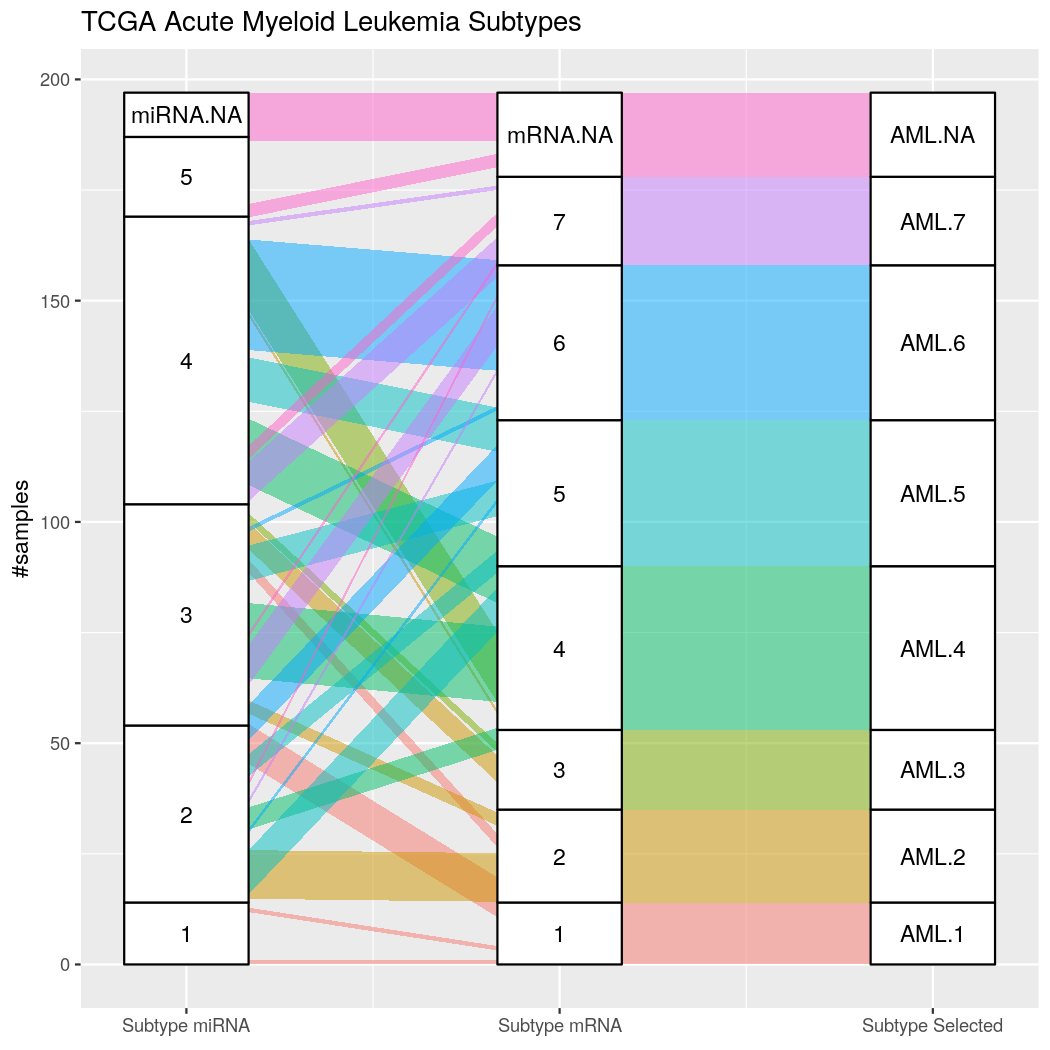

In [62]:
subtypes %>% 
    mutate(Subtype_miRNA=ifelse(is.na(Subtype_miRNA), 'miRNA.NA', Subtype_miRNA), # distinct groups for plotting 
           Subtype_mRNA=ifelse(is.na(Subtype_mRNA), 'mRNA.NA', Subtype_mRNA),
           Subtype_Selected=ifelse(is.na(Subtype_Selected), 'AML.NA', Subtype_Selected)) %>%
    group_by(Subtype_miRNA, Subtype_mRNA, Subtype_Selected) %>%
    summarise(nsamples=n()) %>%
    ggplot(aes(y=nsamples, axis1=Subtype_miRNA, axis2=Subtype_mRNA, 
                      axis3=Subtype_Selected)) +
      geom_alluvium(aes(fill=Subtype_Selected), width = 0, knot.pos = 0, reverse = FALSE) +
      guides(fill = FALSE) +
      geom_stratum(width = 1/3, reverse = FALSE) +
      geom_text(stat = "stratum", aes(label = after_stat(stratum)),
                reverse = FALSE) +
      scale_x_continuous(breaks = 1:3, labels = c("Subtype miRNA", "Subtype mRNA", "Subtype Selected")) +
      labs(title="TCGA Acute Myeloid Leukemia Subtypes", y="#samples")


- Most commonly used classification for TCGA-AML samples is based purely on gene expression data.
- Subtypes found based on miRNA and mRNA expression are videly different.
- There is no integrative classification available.

Can we "improve the classification" of samples by integrating both miRNA and mRNA expression data, as well as methylation data? 

## (3) Examine separate datatypes

### I. Gene expression

In [93]:
exp_subtypes <- tibble(sample_codes=colnames(data_exp)) %>% 
    left_join(subtypes, by = "sample_codes") # extract rows in order of samples in 'data_exp'

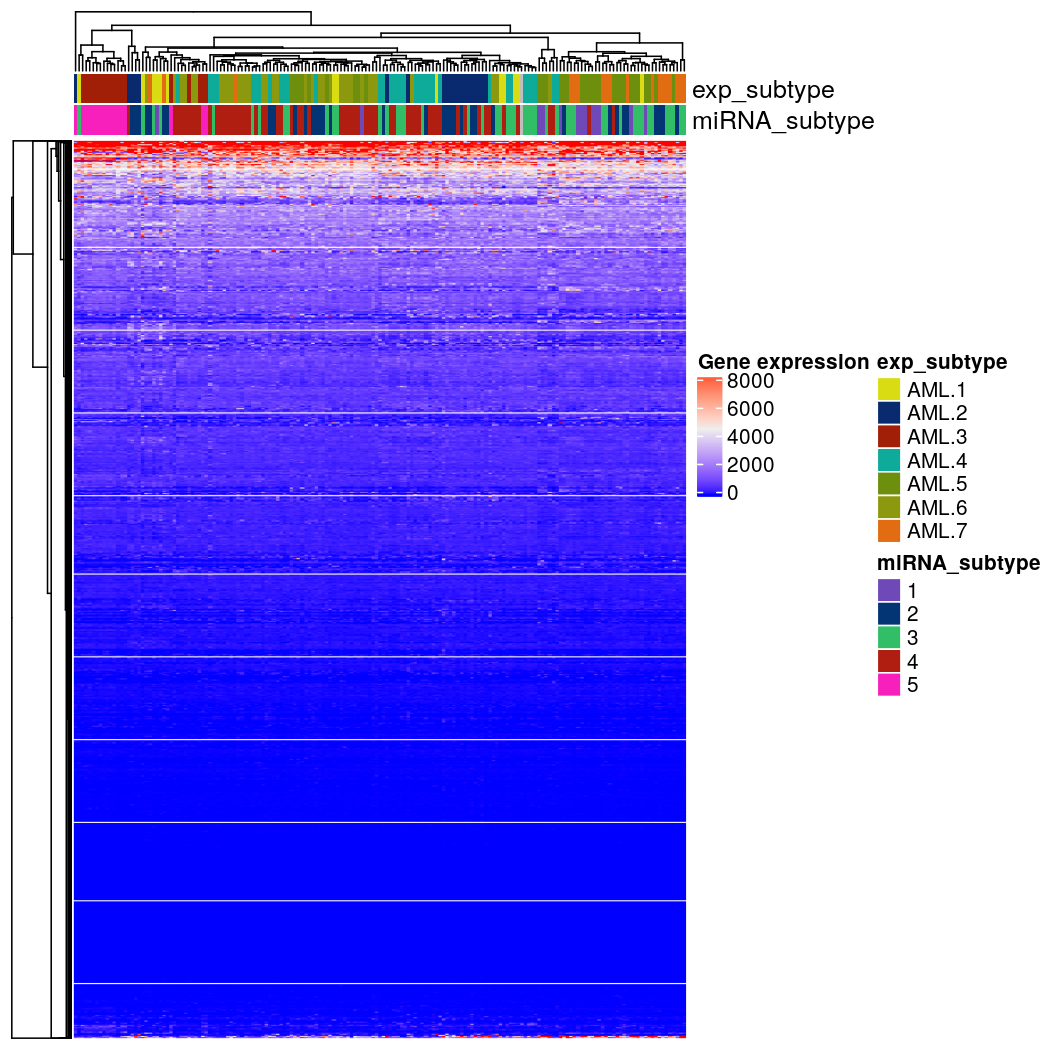

In [94]:
Heatmap(as.matrix(data_exp), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(exp_subtypes$Subtype_Selected),
                                          miRNA_subtype=as.factor(exp_subtypes$Subtype_miRNA)),
        name= "Gene expression")
#this step can take a couple of minutes

Even though the subtypes were created using mRNA expression information, it is hard to notice any difference between samples. This is partially because we are looking at **raw read counts**. Some gene counts greatly dominate the data, which makes it hard to observe the expression patterns/trends. We are going to apply simple **z-score normalization**, by subtracting the overall average gene abundance from the raw expression for each gene, and dividing that result by the standard deviation of all of the measured counts across all samples. This data transformation removes the dependence between mean and standard deviation, as presented on plots below.

In [81]:
normalize.matrix <- function(data.matrix) {
  num = data.matrix - rowMeans(data.matrix, na.rm = TRUE)
  should.keep = (apply(num, 1, function(x) sd(x, na.rm=TRUE)) != 0) # we remove non-informative features 
  return ((num / apply(num, 1, function(x) sd(x, na.rm=TRUE)))[should.keep,])
}
dim(data_exp)                       
data_exp_norm <- normalize.matrix(as.data.frame(data_exp))
dim(data_exp_norm)

[1] 20531   173

[1] 19940   173

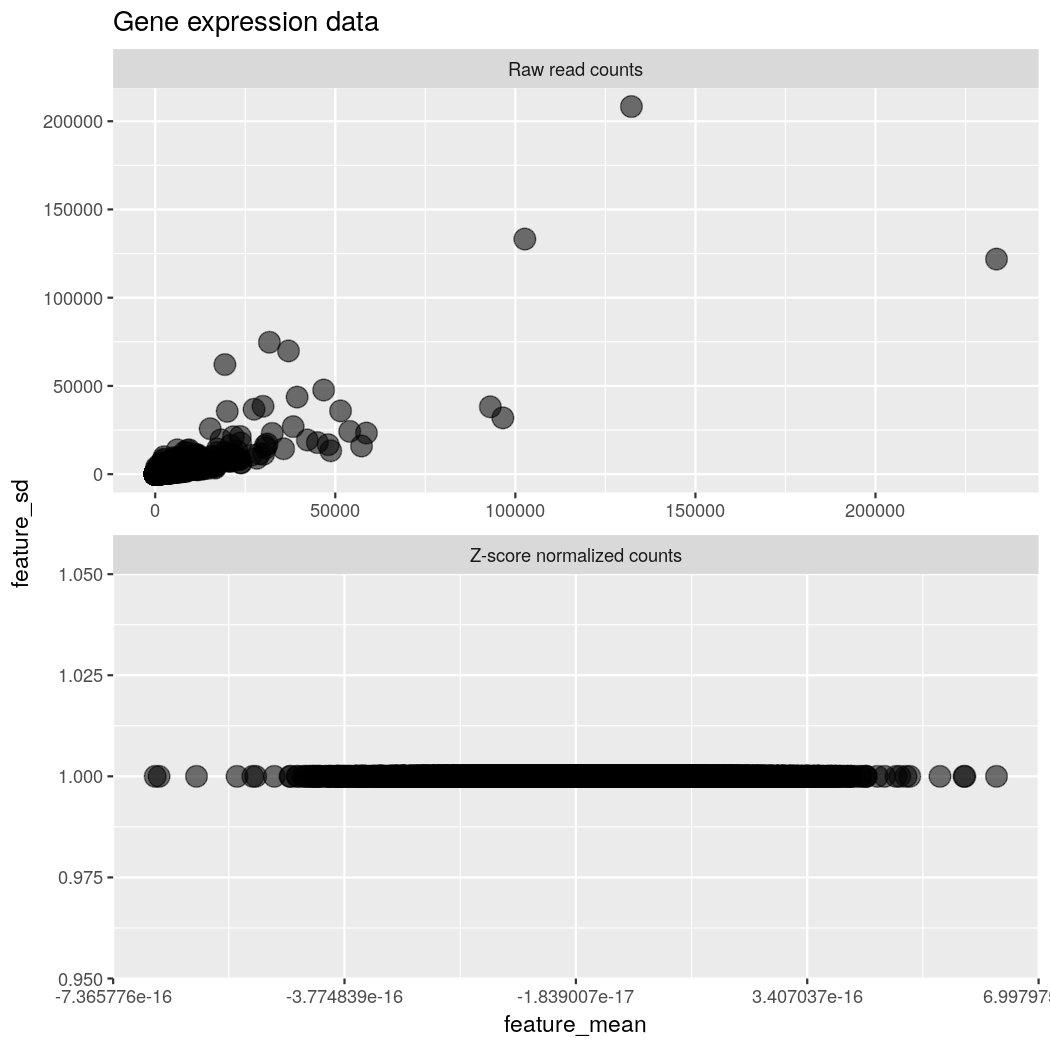

In [107]:
tibble(feature_mean=c(rowMeans(data_exp, na.rm = TRUE), 
                      rowMeans(data_exp_norm, na.rm = TRUE)), 
       feature_sd=c(apply(data_exp, 1, function(x) sd(x, na.rm=TRUE)), 
                          apply(data_exp_norm, 1, function(x) sd(x, na.rm=TRUE))),
        data_matrix=c(rep("Raw read counts", dim(data_exp)[1]), 
                      rep("Z-score normalized counts", dim(data_exp_norm)[1]))) %>%
    mutate(data_matrix=as.factor(data_matrix)) %>%
    ggplot() + 
        geom_point(aes(x=feature_mean, y=feature_sd, size=1, alpha=0.1)) + 
        facet_wrap(data_matrix~., scales="free", ncol=1) + 
        guides(size=FALSE, alpha=FALSE) +
        ggtitle("Gene expression data")

In [90]:
# save normalized gene expression data
write.table(data_exp_norm, file = file.path(data_dir_path, "exp_norm"), 
            row.names = TRUE, col.names = TRUE)

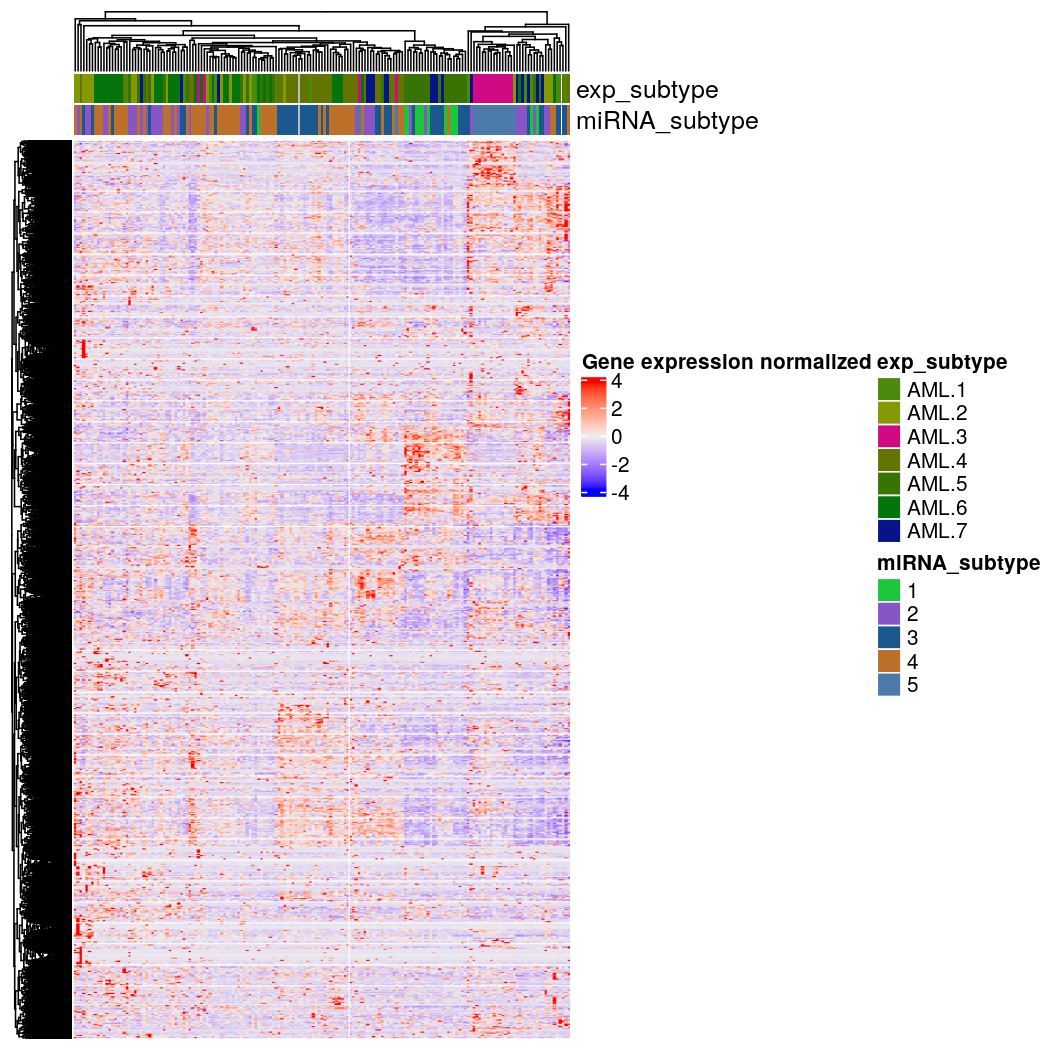

In [101]:
Heatmap(as.matrix(data_exp_norm), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(exp_subtypes$Subtype_Selected),
                                          miRNA_subtype=as.factor(exp_subtypes$Subtype_miRNA)),
        name= "Gene expression normalized")
#this step can take a couple of minutes

### II. microRNA expression

In [102]:
mirna_subtypes <- tibble(sample_codes=colnames(data_mirna)) %>% 
    left_join(subtypes, by = "sample_codes") # extract rows in order of samples in 'data_mirna'

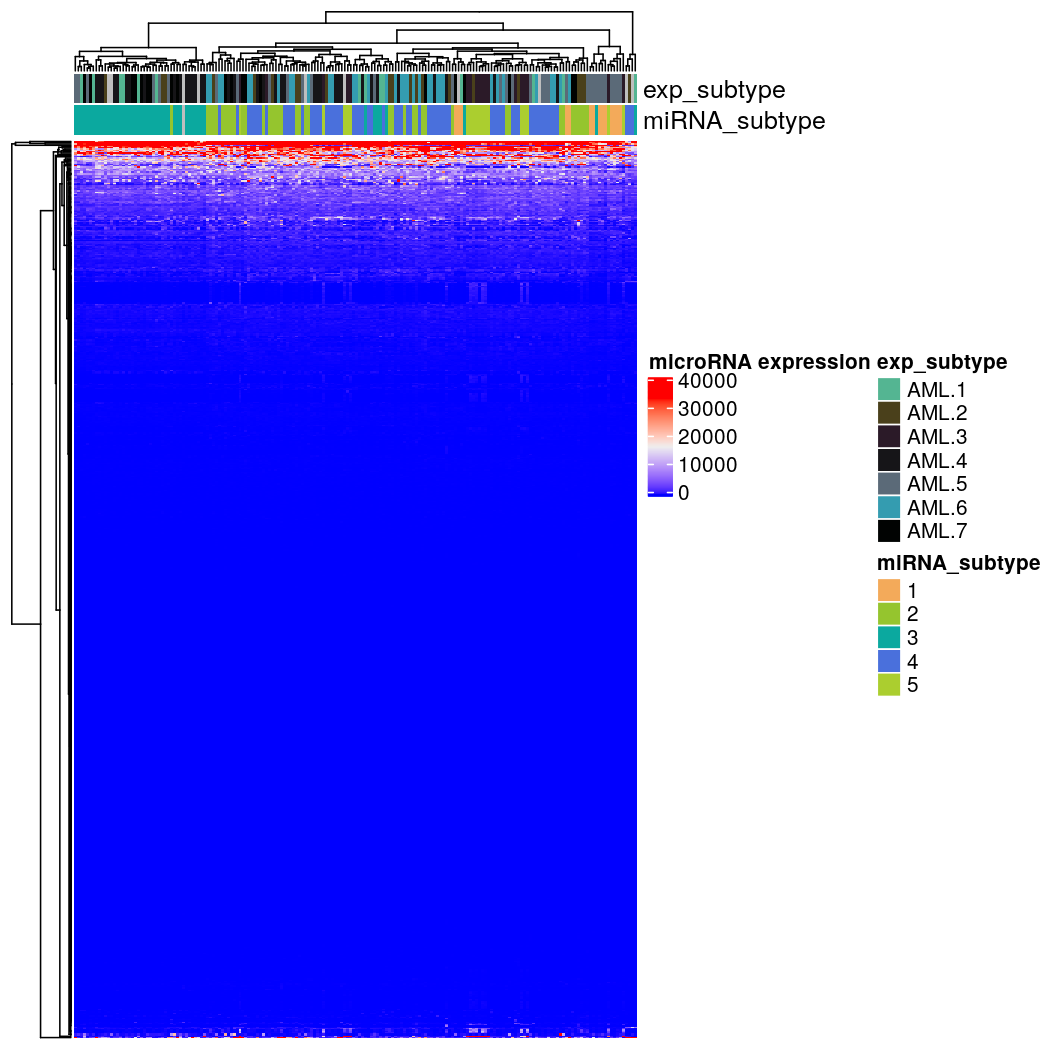

In [103]:
Heatmap(as.matrix(data_mirna), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(mirna_subtypes$Subtype_Selected),
                                          miRNA_subtype=as.factor(mirna_subtypes$Subtype_miRNA)),
        name= "microRNA expression")

In [104]:
dim(data_mirna)                       
data_mirna_norm <- normalize.matrix(as.data.frame(data_mirna))
dim(data_mirna_norm)

[1] 705 188

[1] 561 188

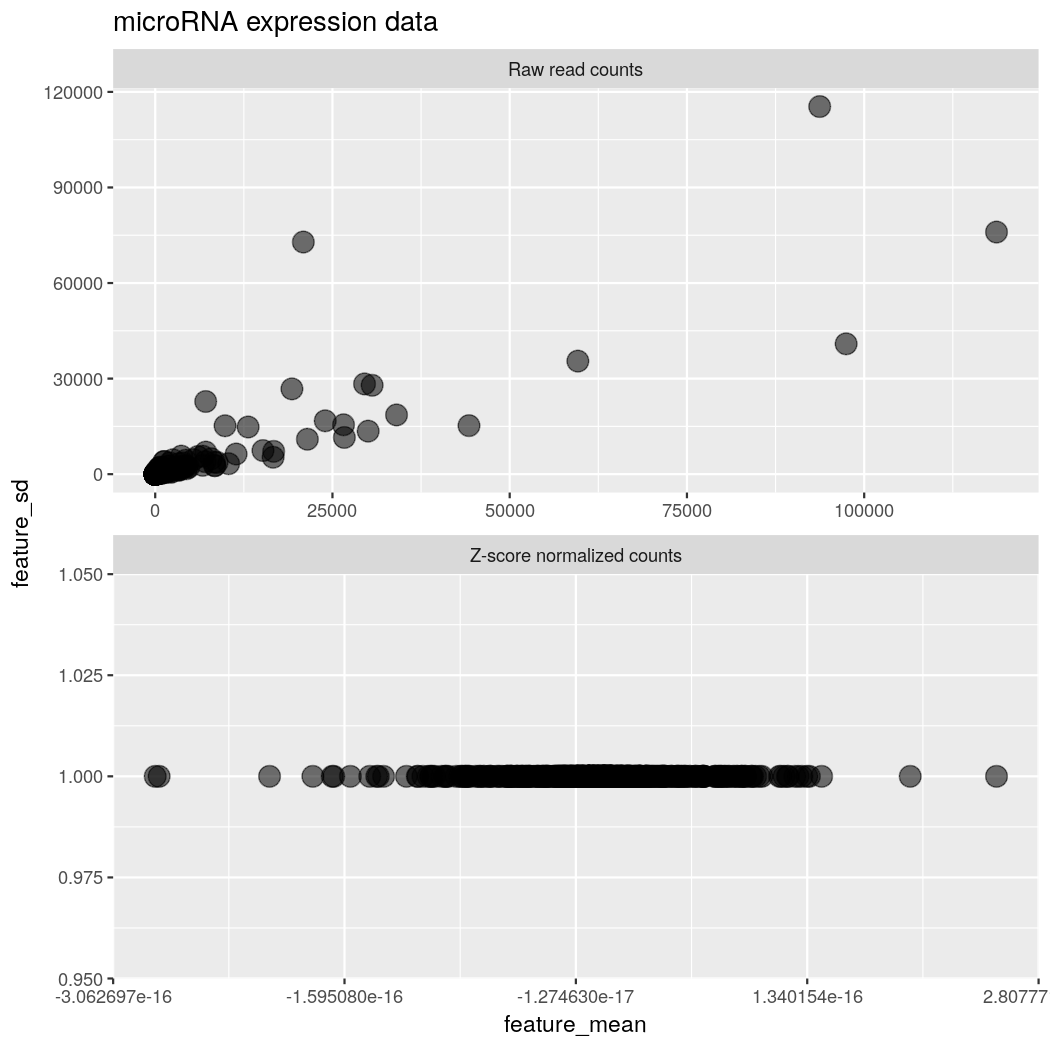

In [108]:
tibble(feature_mean=c(rowMeans(data_mirna, na.rm = TRUE), 
                      rowMeans(data_mirna_norm, na.rm = TRUE)), 
       feature_sd=c(apply(data_mirna, 1, function(x) sd(x, na.rm=TRUE)), 
                          apply(data_mirna_norm, 1, function(x) sd(x, na.rm=TRUE))),
        data_matrix=c(rep("Raw read counts", dim(data_mirna)[1]), 
                      rep("Z-score normalized counts", dim(data_mirna_norm)[1]))) %>%
    mutate(data_matrix=as.factor(data_matrix)) %>%
    ggplot() + 
        geom_point(aes(x=feature_mean, y=feature_sd, size=1, alpha=0.1)) + 
        facet_wrap(data_matrix~., scales="free", ncol=1) + 
        guides(size=FALSE, alpha=FALSE) +
        ggtitle("microRNA expression data")

In [109]:
# save normalized miRNA expression data
write.table(data_mirna_norm, file = file.path(data_dir_path, "mirna_norm"), 
            row.names = TRUE, col.names = TRUE)

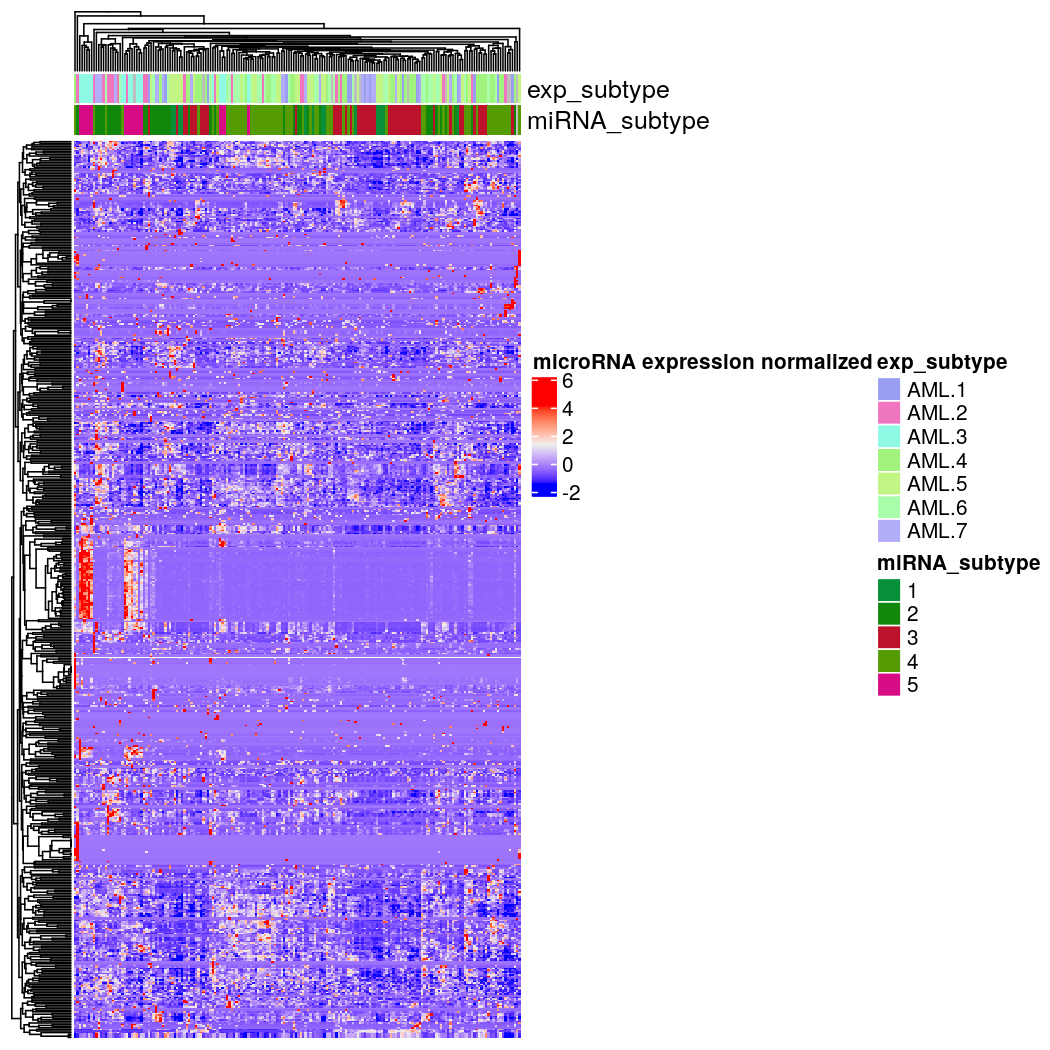

In [110]:
Heatmap(as.matrix(data_mirna_norm), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(mirna_subtypes$Subtype_Selected),
                                          miRNA_subtype=as.factor(mirna_subtypes$Subtype_miRNA)),
        name= "microRNA expression normalized")
#this step can take a couple of minutes

### III. DNA methylation

In [111]:
met_subtypes <- tibble(sample_codes=colnames(data_met)) %>% 
    left_join(subtypes, by = "sample_codes") # extract rows in order of samples in 'data_met'

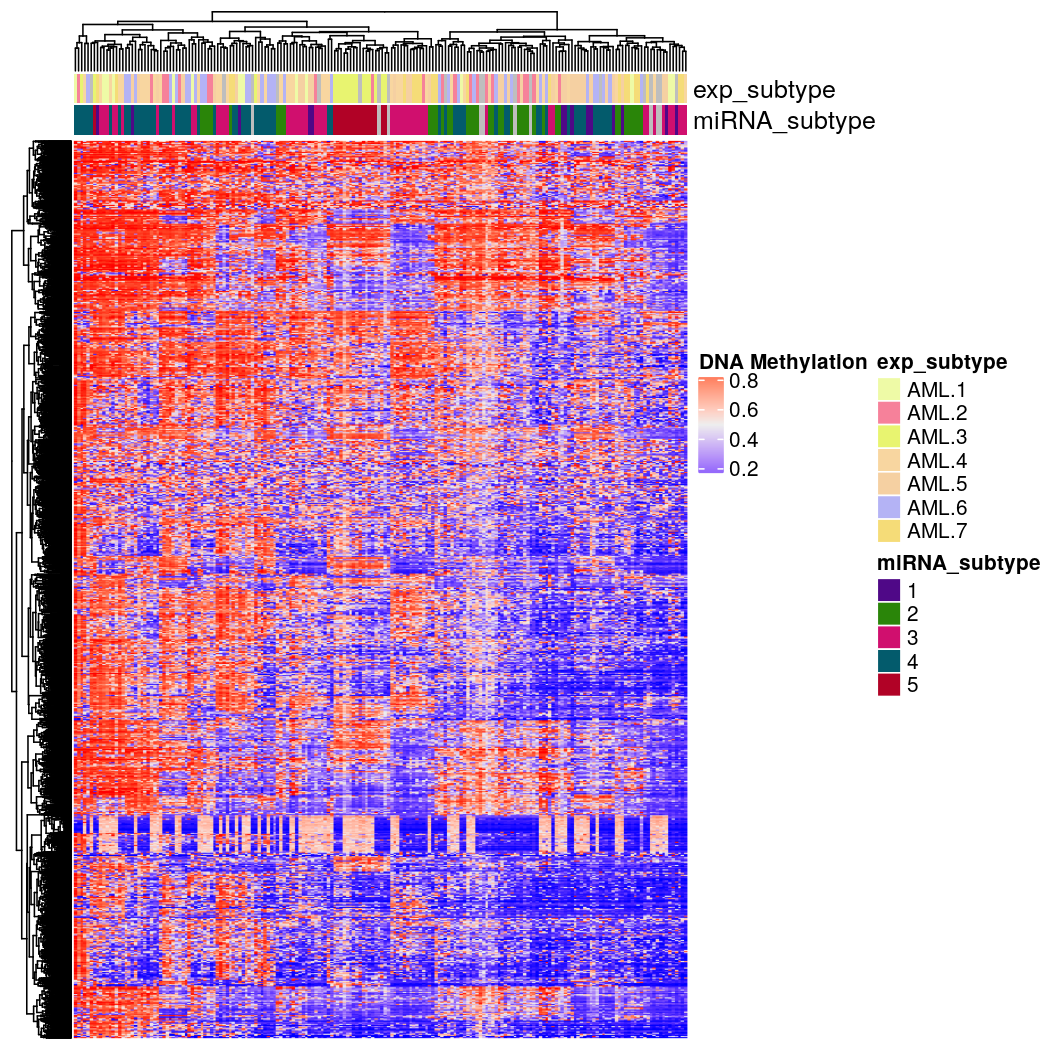

In [112]:
Heatmap(as.matrix(data_met), show_column_names = FALSE, show_row_names = FALSE, 
        top_annotation = HeatmapAnnotation(exp_subtype=as.factor(met_subtypes$Subtype_Selected),
                                          miRNA_subtype=as.factor(met_subtypes$Subtype_miRNA)),
        name= "DNA Methylation")